In [95]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Loading CSV file into the jupyter memory

In [7]:
data = pandas.read_csv("Desktop/uber-raw-data-apr14.csv")

In [10]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [11]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


# Converting date time

In [16]:
data["Date/Time"] = data["Date/Time"].map(pandas.to_datetime)

In [17]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [25]:
dt = data['Date/Time']


# creating a function to return day of month and storing it in new column

In [28]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [117]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Getting weekday and hour

In [33]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
data["hour"] = data["Date/Time"].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# ANALYSIS

## analysing date of month

Text(0.5,1,'F- DoM')

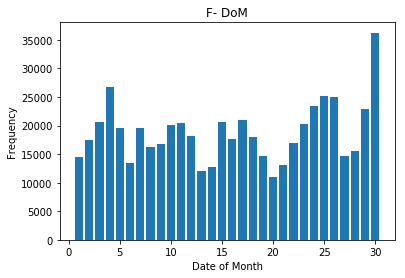

In [41]:
hist(data.dom, bins = 30, rwidth = .8, range = (0.5,30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('F- DoM')

In [55]:
'''for k, row in data.groupby('dom'):
    print(k, len(row))'''

def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [60]:
by_date_sorted = by_date.sort_values()
print(by_date_sorted)

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64


''

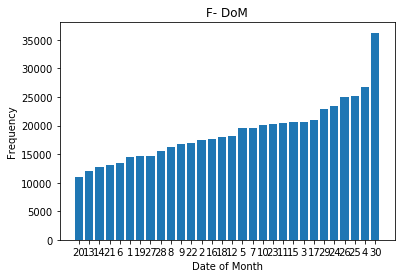

In [68]:
bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('Date of Month')
ylabel('Frequency')
title('F- DoM')
;

## Analysis by hour

(array([ 24614.,  11135.,  27974.,  65706.,  36639.,  42028., 104517.,
         88478.,  75167.,  88258.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

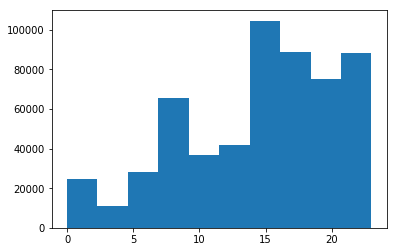

In [58]:
hist(data.hour)

## Analysis by weekday

''

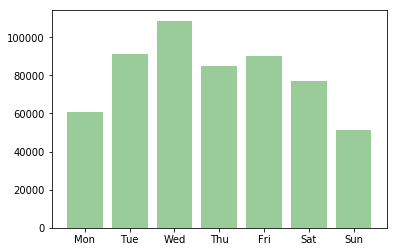

In [76]:
hist(data.weekday, bins = 7, range = (-.5, 6.5), rwidth = .8, color = 'green', alpha = .4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;

## Cross analysis of hour and day of week

In [77]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
print(by_cross)

hour       0     1     2     3     4     5     6     7     8     9   ...   \
weekday                                                              ...    
0         518   261   238   571  1021  1619  2974  3888  3138  2211  ...    
1         765   367   304   516   887  1734  3766  5304  4594  2962  ...    
2         899   507   371   585  1003  1990  4230  5647  5242  3846  ...    
3         792   459   342   567   861  1454  3179  4159  3616  2654  ...    
4        1367   760   513   736   932  1382  2836  3943  3648  2732  ...    
5        3027  2479  1577  1013   706   704   844  1110  1372  1764  ...    
6        4542  2936  1590  1052   685   593   669   873  1233  1770  ...    

hour       14    15    16    17    18    19    20    21    22    23  
weekday                                                              
0        3117  3818  4962  5574  4725  4386  3573  3079  1976  1091  
1        4489  6042  7521  8297  7089  6459  6310  5993  3614  1948  
2        5438  7071  8213 

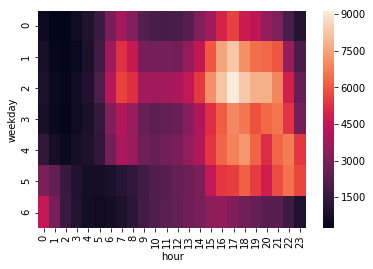

In [78]:
seaborn.heatmap(by_cross)

## By latitude and longitutde

### By Longitude

''

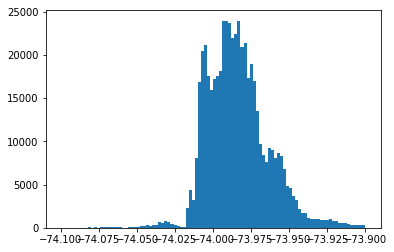

In [102]:
hist(data['Lon'], bins = 100, range = (-74.1, -73.9))
;

### By Latitude

''

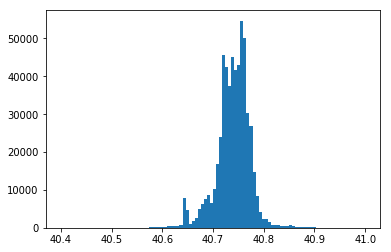

In [106]:
hist(data['Lat'], bins = 100, range = (40.4, 41))
;

### Together

''

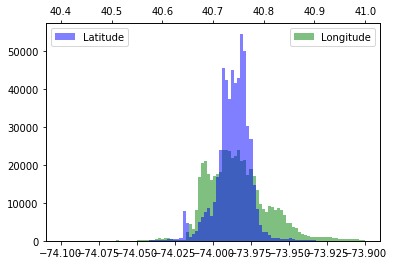

In [112]:
hist(data['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = .5, label = 'Longitude')
legend(loc = 'upper right')
twiny()
hist(data['Lat'], bins = 100, range = (40.4, 41), color = 'b', alpha = .5, label = 'Latitude')
legend(loc = 'upper left')
;

(40.7, 41)

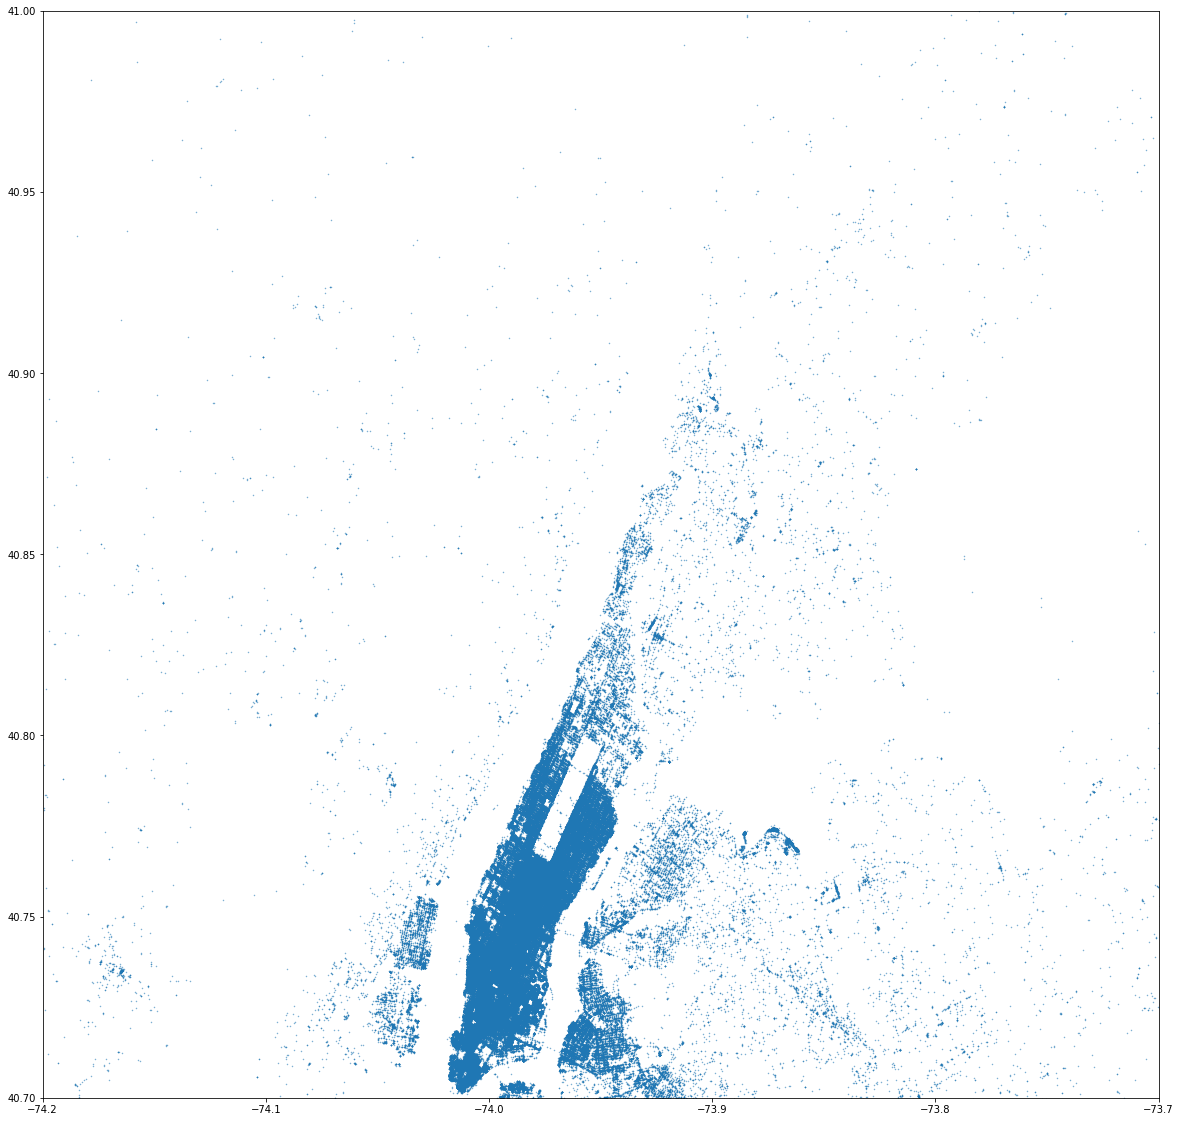

In [115]:
figure(figsize = (20,20))
plot(data['Lon'], data['Lat'], '*', ms = 1, alpha = .5)
xlim(-74.2, -73.7)
ylim(40.7, 41)